# Bài 1: Các khái niệm xác suất - Công thức Bayes
---
Họ và tên: Nguyễn Xuân Hoàng


## I. Lý thuyết

In [2]:
import numpy as np 

 ### Ví dụ 1: Gieo một đồng xu cân đối đồng chất 10000 lần 

In [4]:
so_lan_tung = 10000
#phép thử
tung_dong_xu =  np.random.randint(2, size = so_lan_tung)

In [7]:
so_lan_0 = (tung_dong_xu == 0).sum()
so_lan_1 = (tung_dong_xu == 1).sum()

In [8]:
P_0 = so_lan_0/so_lan_tung
P_1 = so_lan_1/so_lan_tung 
print('P0: ', P_0)
print('P1:', P_1)

P0:  0.4966
P1: 0.5034


### Ví dụ 2: Gieo một đồng xu bất cân đối 10000 lần

In [10]:
def tung_xu():
    if np.random.random() < 0.6:
        return 0
    else:
        return 1
phep_thu = np.zeros(so_lan_tung)
for i in range(so_lan_tung):
    phep_thu[i]= tung_xu()
print('P0: ', (phep_thu == 0).sum()/so_lan_tung)
print('P1: ', (phep_thu == 1).sum()/so_lan_tung)

P0:  0.602
P1:  0.398


### Ví dụ 3: Hàm tính công thức Bayes

In [18]:
def bayes_func(p_a, p_b_given_a, p_b_given_not_a):
    #Tinh P(notA)
    p_not_a = 1 - p_a
    #Tinh P(B) banh cong thuc xs toan phan
    p_b = p_b_given_a*p_a + p_b_given_not_a*p_not_a
    #Tinh P(A/B) bang cong thuc Bayes
    p_a_given_b = (p_b_given_a*p_a) / p_b
    return p_a_given_b

In [24]:
#Example
#P(A)
p_a = 0.999
#P(B|A)
p_b_given_a = 0.01
#P(B/notA)
p_b_given_not_a = 0.98
#P(A|B)
rs = bayes_func(p_a, p_b_given_a, p_b_given_not_a)
print('P(A|B) = ', round(rs * 100, 4), '%')
print('P(not A|B) = ', round((1-rs) * 100, 4), '%')

P(A|B) =  91.0665 %
P(not A|B) =  8.9335 %


#### Ví dụ 4: Confusion Matrix

In [27]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

y_true = np.array([1,0,1,0,1,1,0,0,0,0])
y_pred = np.array([1,1,1,0,0,1,0,0,0,1])

print('Accuracy:', accuracy_score(y_true,y_pred))
print('Recall:', recall_score(y_true,y_pred))
print('Precision:', precision_score(y_true,y_pred))
print('\n Confusion Matrix: \n', confusion_matrix(y_true, y_pred))

Accuracy: 0.7
Recall: 0.75
Precision: 0.6

 Confusion Matrix: 
 [[4 2]
 [1 3]]


Text(33.0, 0.5, 'True')

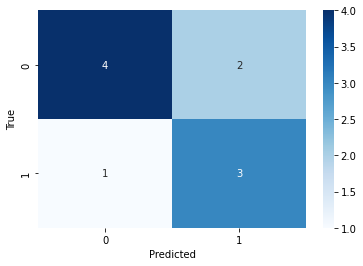

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.heatmap(confusion_matrix(y_true, y_pred), annot = True, fmt = '', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## II. BÀI TẬP THỰC HÀNH 

### Bài thực hành 1.1
• Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào các giá trị mô phỏng tìm các xác suất ở câu dưới.

• Tìm xác suất để số chấm xuất hiện là 4.

• Tìm xác suất số chấm xuất hiện lớn hơn hoặc bằng 4.

• Giả sử biết rằng số chấm xuất hiện lớn hơn hoặc bằng 4. Tìm xác suất để mặt 6 chấm xuất hiện.


In [32]:
so_lan_tung = 5000
phep_thu = np.random.randint(1,7, size = so_lan_tung)

In [35]:
#P4: xác suất số chấm xuất hiện là 4
P4 = (phep_thu == 4).sum()/so_lan_tung
print('Xác suất để số chấm xuất hiện là 4 là: ', P4)

#P4_greater: xác suất số chấm xuất hiện lớn hơn hoặc bằng 4
P4_greater = (phep_thu >= 4).sum()/so_lan_tung
print('Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4 là: ', P4_greater)

#P6: Xác suất số chấm xuất hiện là 6: 
P6 = (phep_thu == 6).sum()/so_lan_tung

print('Xác suất để mặt 6 xuất hiện biết số chấm xuất hiện lớn hơn hoặc bằng 4 là: ', P6/P4_greater)


Xác suất để số chấm xuất hiện là 4 là:  0.1668
Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4 là:  0.5008
Xác suất để mặt 6 xuất hiện biết số chấm xuất hiện lớn hơn hoặc bằng 4 là:  0.3422523961661342


###  Bài thực hành 1.2
• Bài toán: Hãy xây một mô hình phân loại loài hoa diên vỹ (Iris)

• Giải quyết bài toán gồm 4 bước: 1. Thu thập dữ liệu; 2. Xây dựng mô hình; 3. Huấn
luyện mô hình; 4. Đánh giá mô hình và triển khai

• Mô tả hoa diên vỹ là một họ hoa có nhiêu loài như setona, versicolor và virginica

• Dưới đây là chương trình thực hiện bước 1, 2, 3. Bạn hãy tìm cách đánh giá mô hình dựa vào Accuracy, Precision, Recall?


In [36]:
from sklearn import datasets 
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [39]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [40]:
y_pred

array([2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0,
       2])

In [44]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred,  average = 'macro'))
print('Precision:', precision_score(y_test,y_pred, average = 'macro'))
print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9555555555555556
Recall: 0.9553571428571429
Precision: 0.9553571428571429

 Confusion Matrix: 
 [[15  0  0]
 [ 0 13  1]
 [ 0  1 15]]
